### Dynamic Pricing Model to Adjust Price based on Demand, Competition Prices and Inventory Levels in E-commerce Applications

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA               # to forecast datapoint
#from statsmodels.tsa.holtswinters import ExponentialSmoothing       
from statsmodels.tsa.api import ExponentialSmoothing                       # to forecast datapoint
from scipy.optimize import minimize                                        # to minimize functions
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\Abdulwahab\Desktop\Amdari Projects\Dynamic  Pricing Strategy - Dynamic  Pricing model to Adjust Price based on Demand\Section 2 - Projects Solutions Videos\Dataset.csv")
df.head()

,Product_ID,Timestamp,Demand,Competitor_Prices,Inventory_Levels,Cost_Prices,Selling_Prices,Product_Categories,Product_Conditions,Product_Ratings,...,Customer_Ages,Customer_Genders,Competitor_Strategies,Marketing_Campaigns,Website_Traffic,Conversion_Rates,Lead_Times,Supplier_Terms,Product_Age,New_Product_Releases
0,1005,2022-07-11,239,1331,646,1040.04,1045.04,Electronics,New,5.0,...,24.0,Female,Price Matching,Email Campaign,8064.0,0.10064,1,Net 30,11,No
1,1530,2021-02-23,290,1441,1141,1186.49,1192.49,Clothing,New,4.0,...,44.0,Male,Bundle Offers,TV Ads,8092.0,0.10092,5,Net 30,10,No
2,1531,2022-09-23,533,1704,861,1408.42,1426.42,Clothing,New,4.0,...,18.0,Female,Discounts,Email Campaign,8180.0,0.10180,6,Net 30,8,No
3,1531,2022-06-21,228,1593,854,1338.38,1350.38,Clothing,Used,4.0,...,27.0,Female,Price Matching,Email Campaign,8040.0,0.10040,9,Net 30,8,No
4,1000,2021-12-23,361,1533,649,1250.09,1262.09,Electronics,New,3.0,...,36.0,Female,Discounts,Social Media Ads,8208.0,0.10208,4,Net 30,10,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109768 entries, 0 to 109767
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  109768 non-null  int64  
 1   Timestamp                   109768 non-null  object 
 2   Demand                      109768 non-null  int64  
 3   Competitor_Prices           109768 non-null  int64  
 4   Inventory_Levels            109768 non-null  int64  
 5   Cost_Prices                 109768 non-null  float64
 6   Selling_Prices              109768 non-null  float64
 7   Product_Categories          109768 non-null  object 
 8   Product_Conditions          109768 non-null  object 
 9   Product_Ratings             109768 non-null  float64
 10  Number_Of_Reviews           109768 non-null  int64  
 11  Days_Since_Product_Listing  109768 non-null  int64  
 12  Customer_Locations          109768 non-null  object 
 13  Customer_Ages 

In [4]:
df.isnull().sum()

Product_ID                    0
Timestamp                     0
Demand                        0
Competitor_Prices             0
Inventory_Levels              0
Cost_Prices                   0
Selling_Prices                0
Product_Categories            0
Product_Conditions            0
Product_Ratings               0
Number_Of_Reviews             0
Days_Since_Product_Listing    0
Customer_Locations            0
Customer_Ages                 0
Customer_Genders              0
Competitor_Strategies         0
Marketing_Campaigns           0
Website_Traffic               0
Conversion_Rates              0
Lead_Times                    0
Supplier_Terms                0
Product_Age                   0
New_Product_Releases          0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.duplicated().any()

False

In [7]:
df.describe()

,Product_ID,Demand,Competitor_Prices,Inventory_Levels,Cost_Prices,Selling_Prices,Product_Ratings,Number_Of_Reviews,Days_Since_Product_Listing,Customer_Ages,Website_Traffic,Conversion_Rates,Lead_Times,Product_Age
count,109768.000000,109768.000000,109768.000000,109768.000000,109768.000000,109768.000000,109768.000000,109768.000000,109768.000000,109768.000000,109768.000000,109768.000000,109768.000000,109768.000000
mean,1477.586683,507.674313,1550.279016,982.418073,1239.216171,1250.187146,3.489068,50.718661,182.076817,35.217659,8202.874645,0.102029,5.044758,6.592604
std,485.736285,242.318851,835.763746,390.250530,675.942730,675.965767,0.833933,24.861973,104.790901,9.602709,99.447893,0.000994,2.736953,3.587284
min,1000.000000,1.000000,100.000000,6.000000,64.590000,70.000000,1.000000,10.000000,1.000000,18.000000,8040.000000,0.100400,1.000000,0.000000
25%,1004.000000,346.000000,827.000000,714.000000,658.247500,668.982500,3.000000,32.000000,91.000000,28.000000,8128.000000,0.101280,3.000000,4.000000
50%,1526.000000,527.000000,1550.000000,930.000000,1234.060000,1245.025000,3.000000,51.000000,182.000000,35.000000,8204.000000,0.102040,5.000000,7.000000
75%,1534.000000,691.000000,2276.000000,1204.000000,1810.305000,1821.365000,4.000000,70.000000,272.000000,42.000000,8280.000000,0.102800,7.000000,10.000000
max,2331.000000,998.000000,2999.000000,2766.000000,2699.270000,2717.270000,5.000000,100.000000,364.000000,65.000000,8400.000000,0.104000,29.000000,14.000000


In [8]:
df.describe(include = ['bool','object'])

,Timestamp,Product_Categories,Product_Conditions,Customer_Locations,Customer_Genders,Competitor_Strategies,Marketing_Campaigns,Supplier_Terms,New_Product_Releases
count,109768,109768,109768,109768,109768,109768,109768,109768,109768
unique,1097,3,3,3,2,3,3,2,2
top,2021-12-23,Electronics,New,USA,Female,Discounts,Social Media Ads,Net 30,No
freq,130,44094,65973,43877,55001,87169,56452,109503,64660


### Exploratory Data Analysis

- Univariate Analysis
- Bivariate Analysis
- Profit Margin Analysis
- Temporal Analysis

#### Univariate Analysis
- Numerical Variables

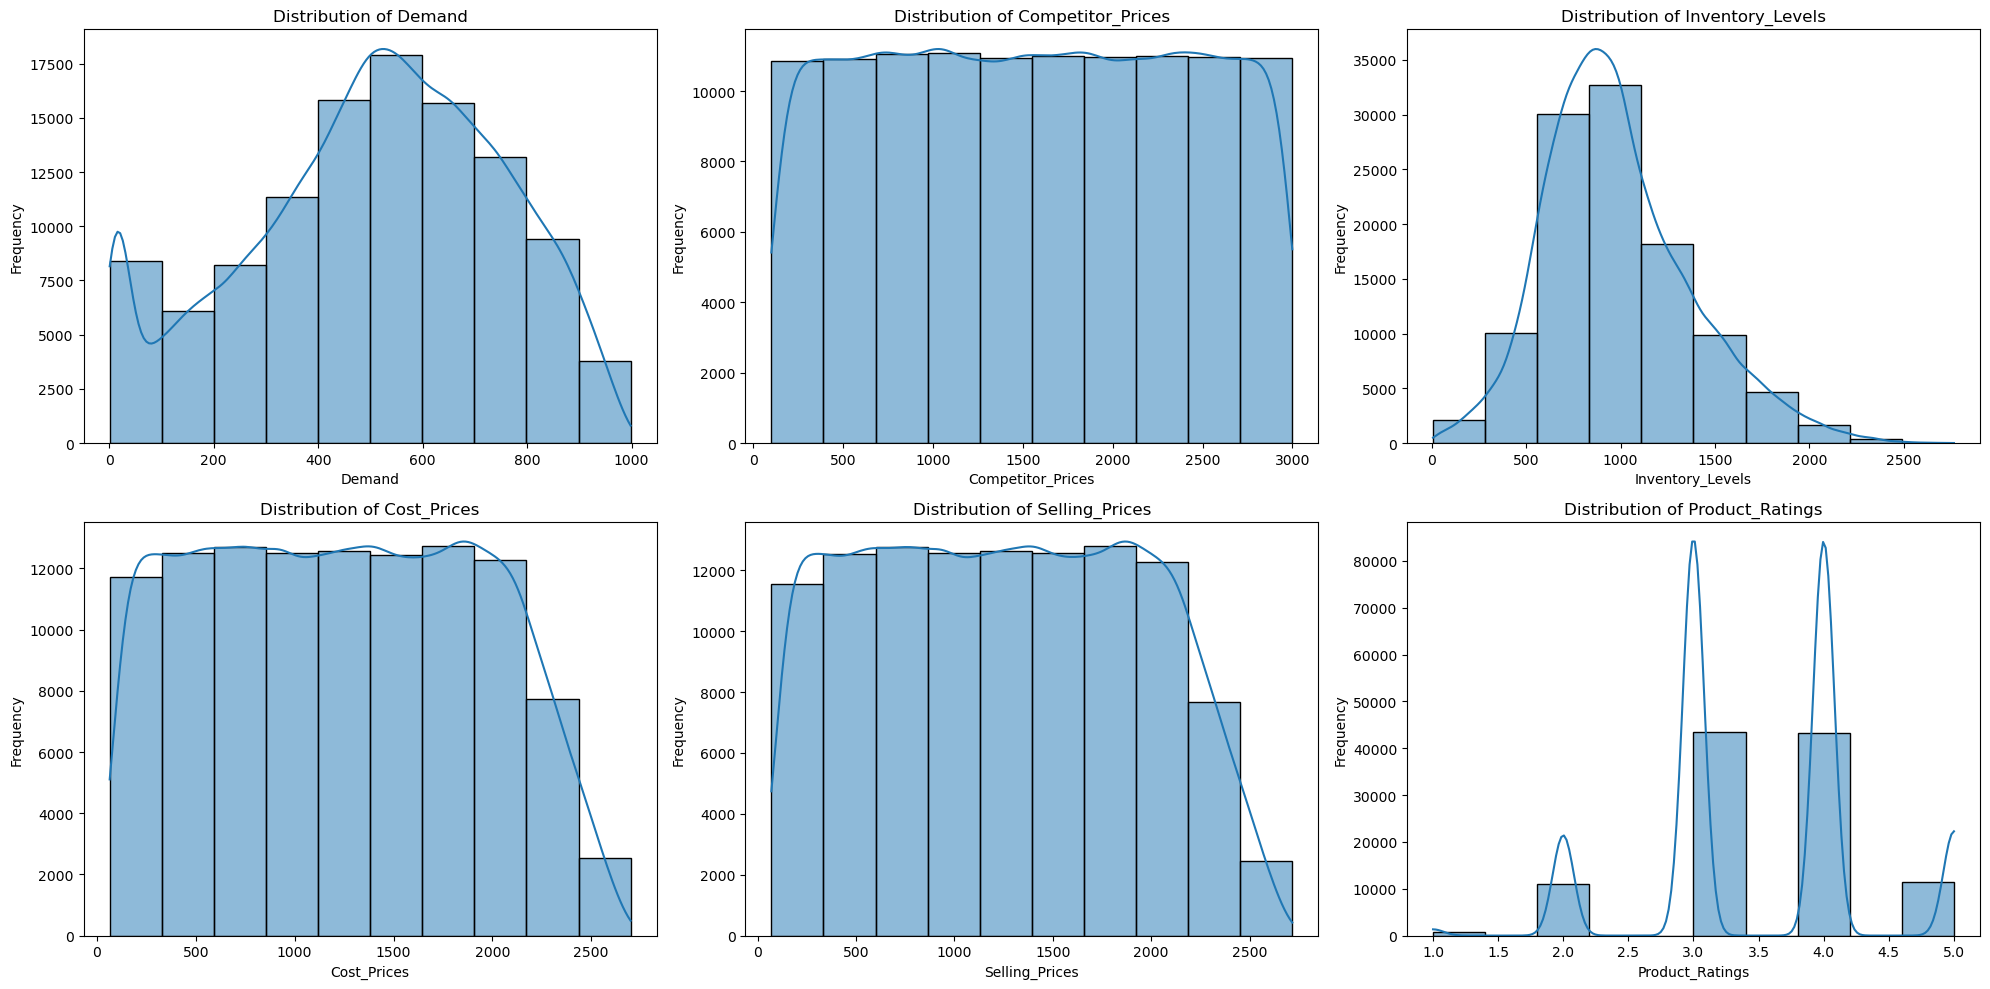

In [9]:
numerical_columns = ['Demand', 'Competitor_Prices', 'Inventory_Levels', 'Cost_Prices', 'Selling_Prices',
                     'Product_Ratings'  
]

fig, axs = plt.subplots(2,3, figsize=(20,10))

for ax, col in zip(axs.flat, numerical_columns):
    sns.histplot(df[col], bins = 10, kde = True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

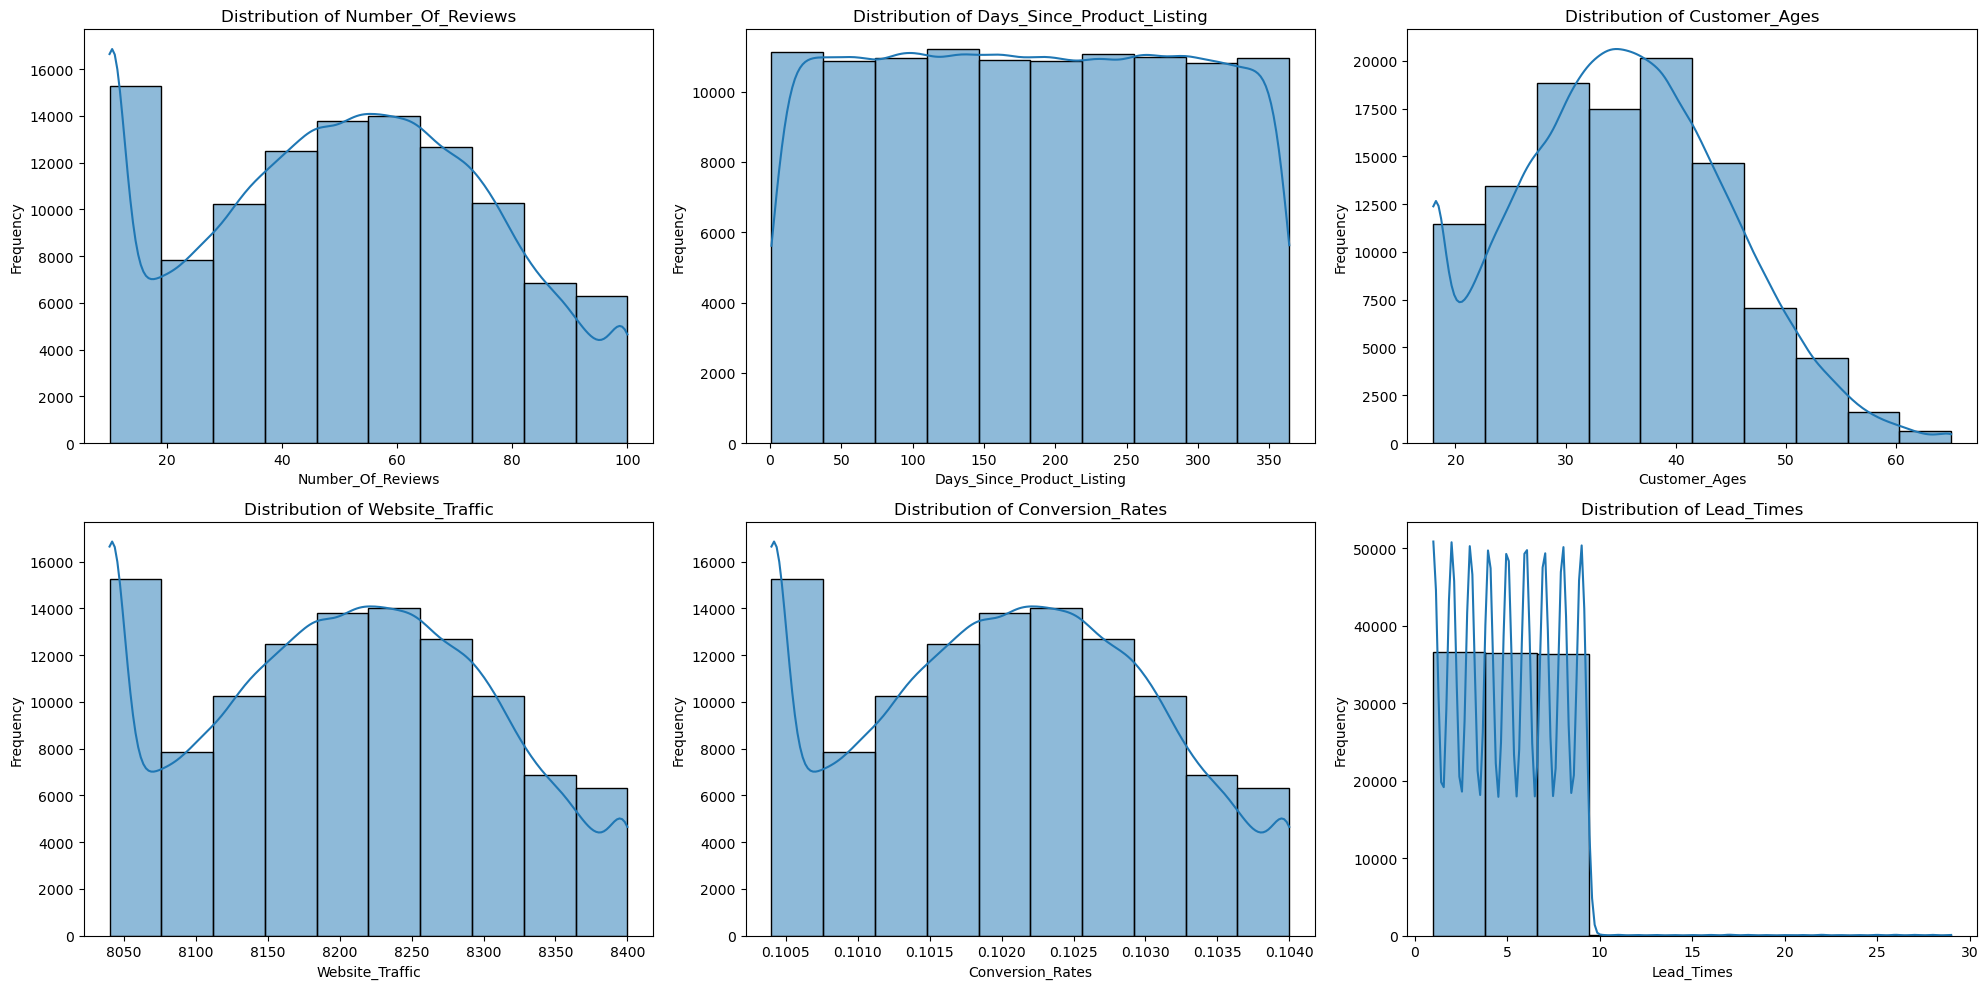

In [10]:
numerical_columns = ['Number_Of_Reviews', 'Days_Since_Product_Listing', 'Customer_Ages',
                     'Website_Traffic', 'Conversion_Rates', 'Lead_Times'   
]

fig, axs = plt.subplots(2,3, figsize=(20,10))

for ax, col in zip(axs.flat, numerical_columns):
    sns.histplot(df[col], bins = 10, kde = True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

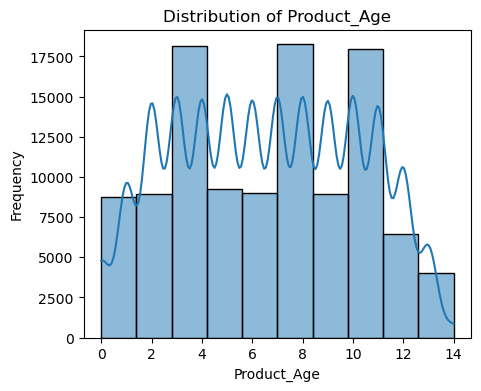

In [11]:
plt.figure(figsize=(5,4))

ax = sns.histplot(x = 'Product_Age', data = df, bins = 10, kde = True)
ax.set_title('Distribution of Product_Age')
ax.set_xlabel('Product_Age')
ax.set_ylabel('Frequency')
plt.show()

#### Univariate Analysis
- Categorical Variables

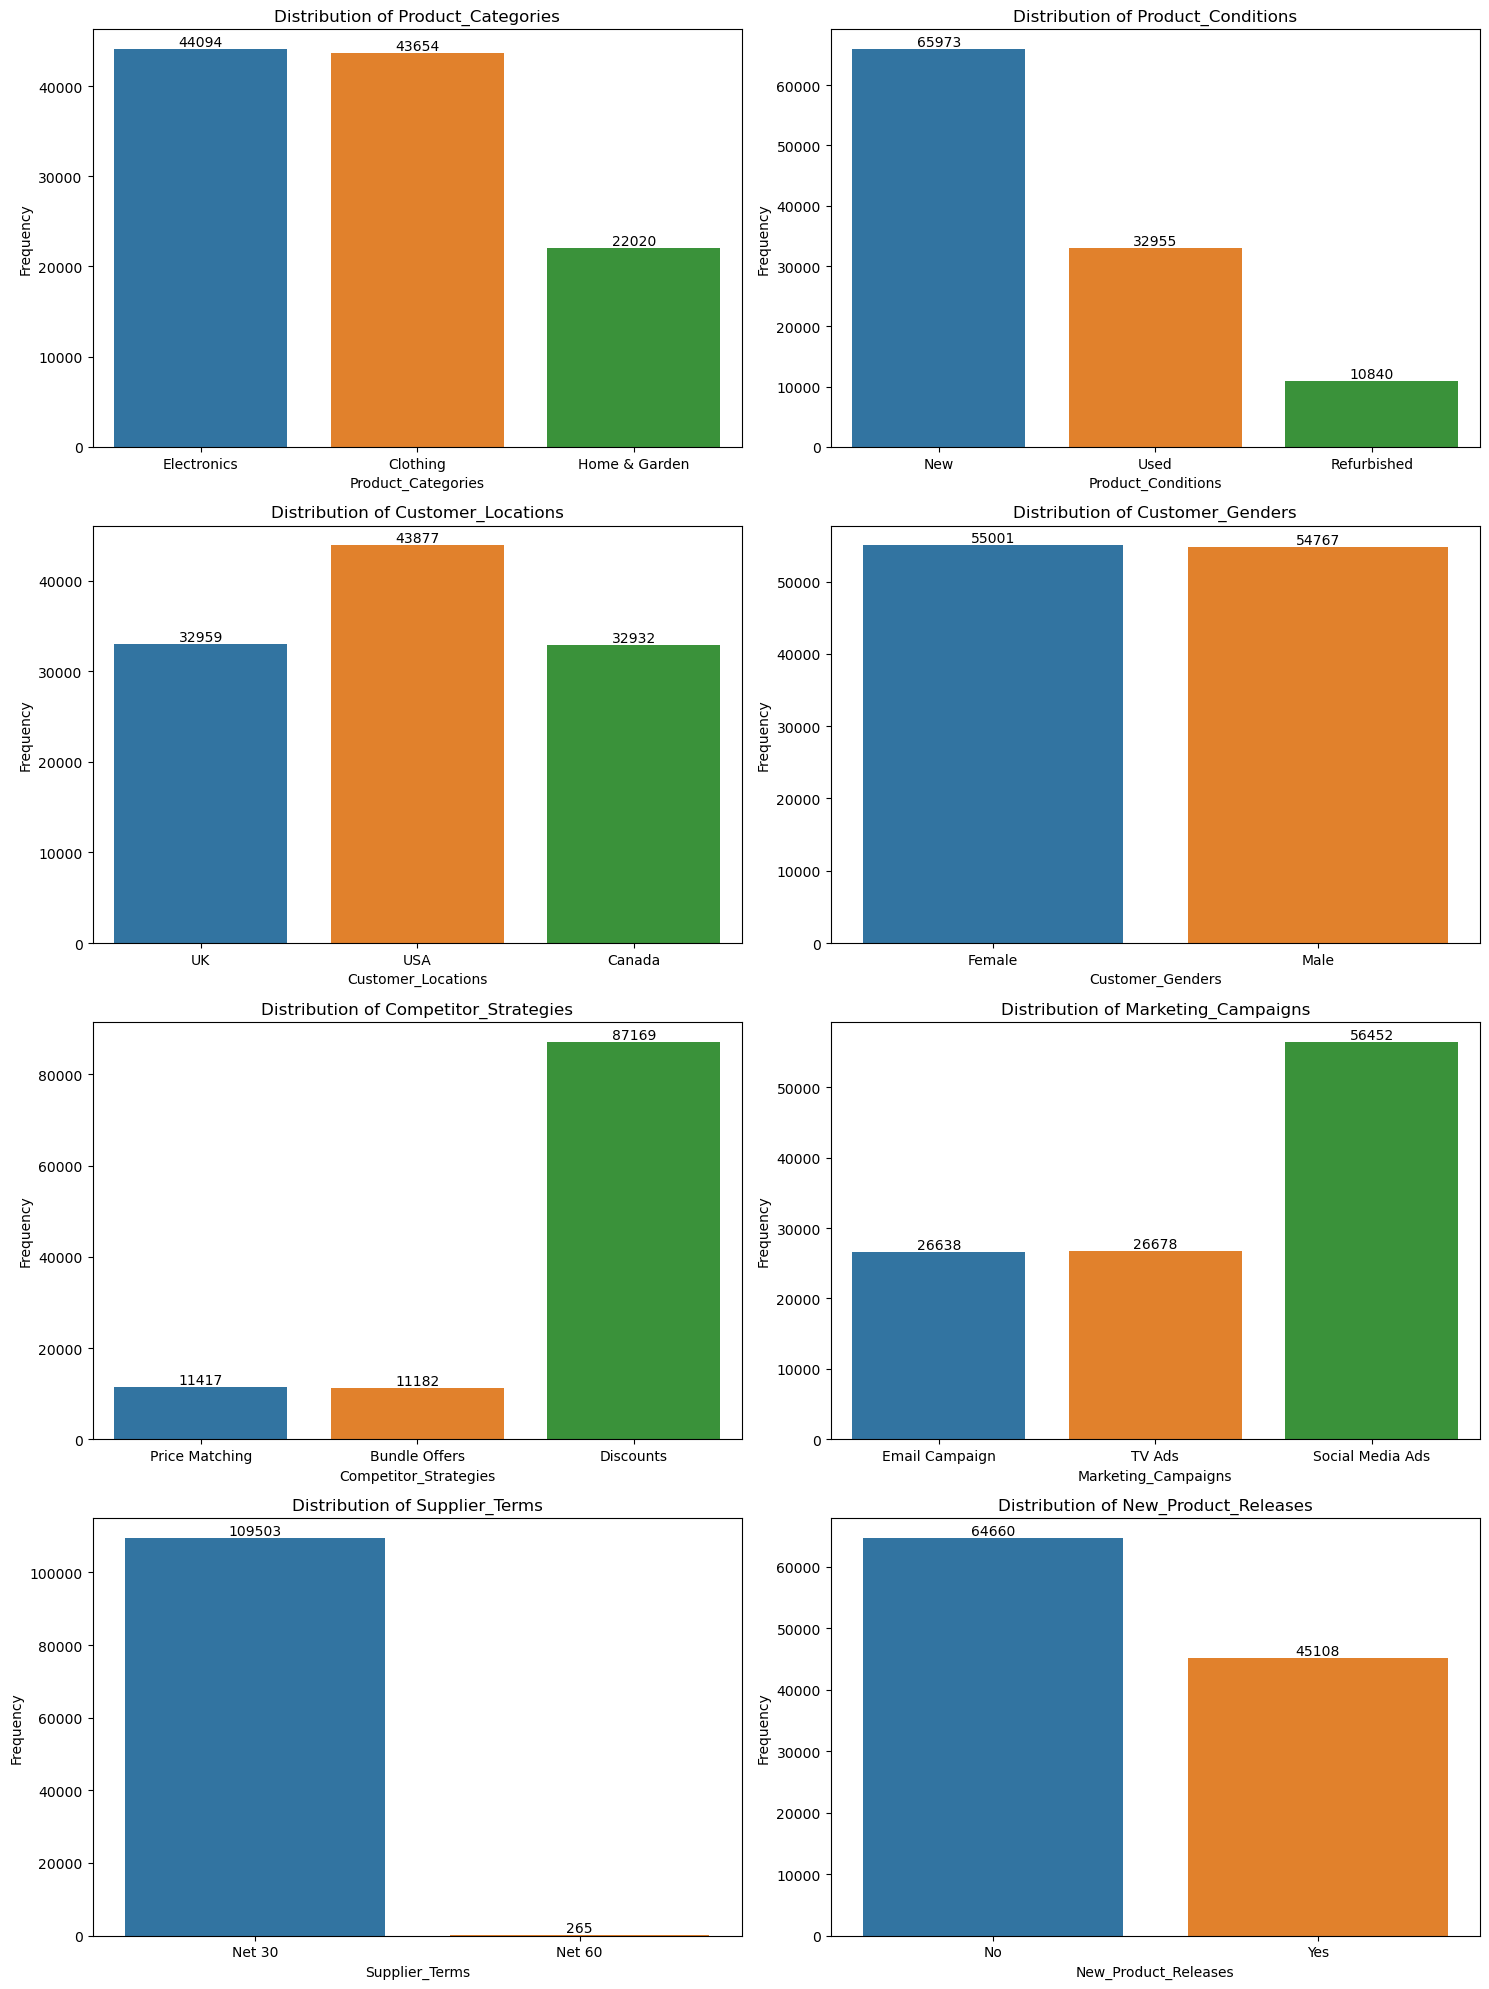

In [12]:
categorical_columns = ['Product_Categories', 'Product_Conditions', 'Customer_Locations',
                     'Customer_Genders', 'Competitor_Strategies', 'Marketing_Campaigns', 
                     'Supplier_Terms', 'New_Product_Releases'   
]

fig, axs = plt.subplots(4,2, figsize=(15,20))

for ax, col in zip(axs.flat, categorical_columns):
    sns.countplot(x = col, data = df, ax=ax)
    for container in ax.containers:
        ax.bar_label(container, fmt = '%d')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

### Bivariate Analysis

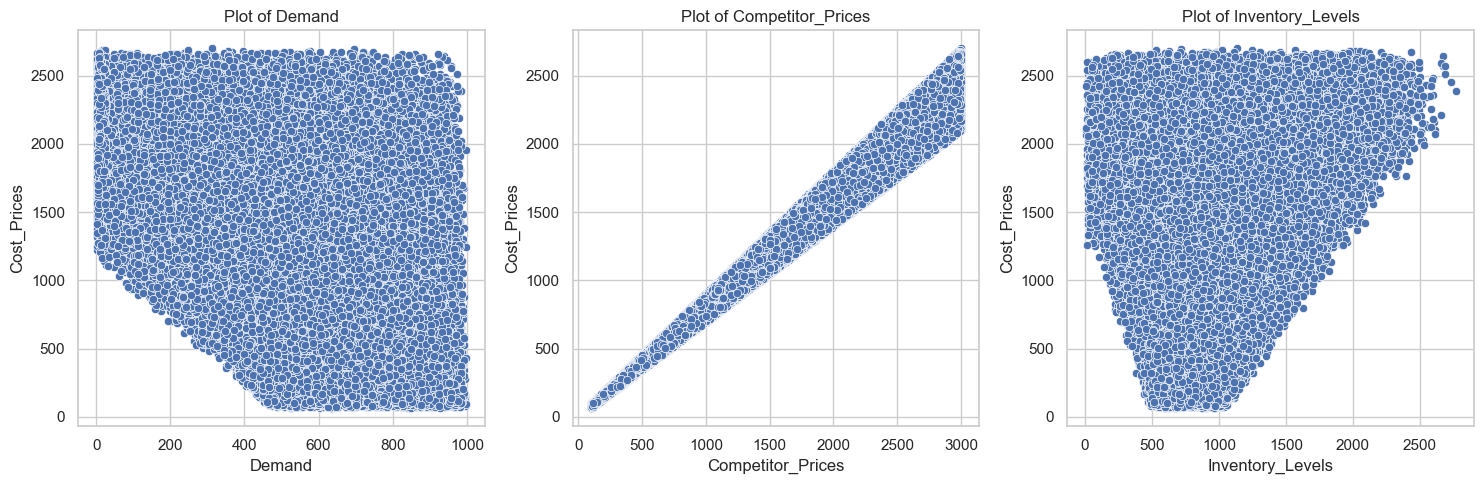

In [39]:
sns.set(style='whitegrid')

feature_plot = ['Demand', 'Competitor_Prices', 'Inventory_Levels']

fig, axes = plt.subplots(1,3, figsize=(15,5))
axes = axes.flatten()

for i, feature in enumerate(feature_plot):
    sns.scatterplot(x = feature, y = 'Cost_Prices', data = df, ax=axes[i])
    axes[i].set_title(f'Plot of {feature}')
    
plt.tight_layout()
plt.show()

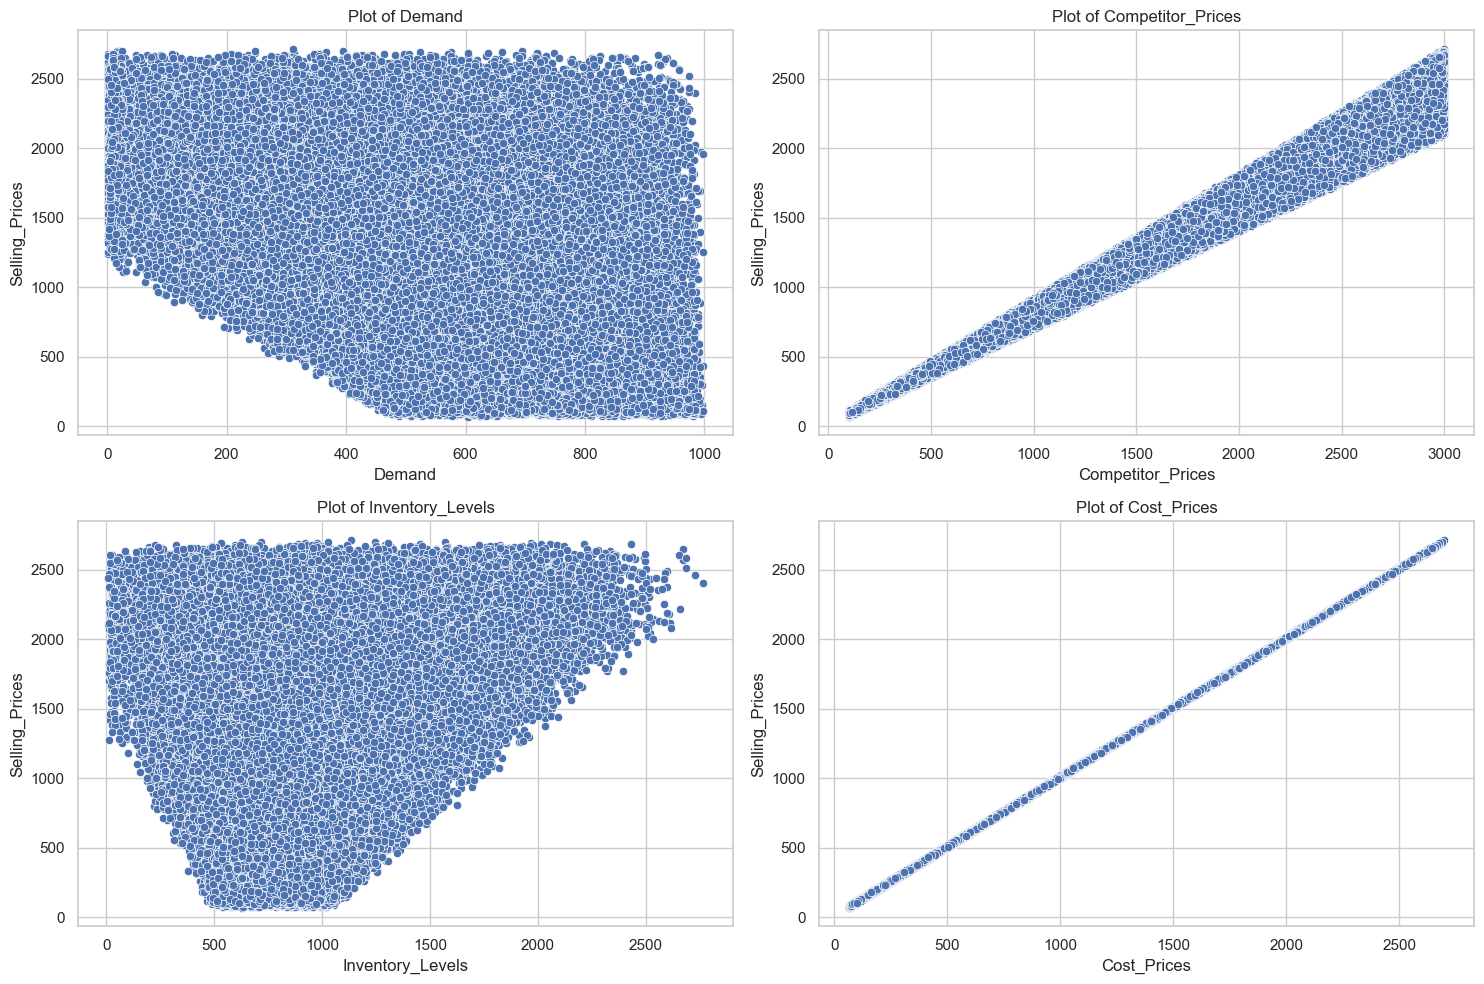

In [42]:
sns.set(style='whitegrid')

feature_plot = ['Demand', 'Competitor_Prices', 'Inventory_Levels', 'Cost_Prices']

fig, axes = plt.subplots(2,2, figsize=(15,10))
axes = axes.flatten()

for i, feature in enumerate(feature_plot):
    sns.scatterplot(x = feature, y = 'Selling_Prices', data = df, ax=axes[i])
    axes[i].set_title(f'Plot of {feature}')
    
plt.tight_layout()
plt.show()

In [27]:
df.columns

Index(['Product_ID', 'Timestamp', 'Demand', 'Competitor_Prices',
       'Inventory_Levels', 'Cost_Prices', 'Selling_Prices',
       'Product_Categories', 'Product_Conditions', 'Product_Ratings',
       'Number_Of_Reviews', 'Days_Since_Product_Listing', 'Customer_Locations',
       'Customer_Ages', 'Customer_Genders', 'Competitor_Strategies',
       'Marketing_Campaigns', 'Website_Traffic', 'Conversion_Rates',
       'Lead_Times', 'Supplier_Terms', 'Product_Age', 'New_Product_Releases'],
      dtype='object')

### Profit Margin for the Product Category

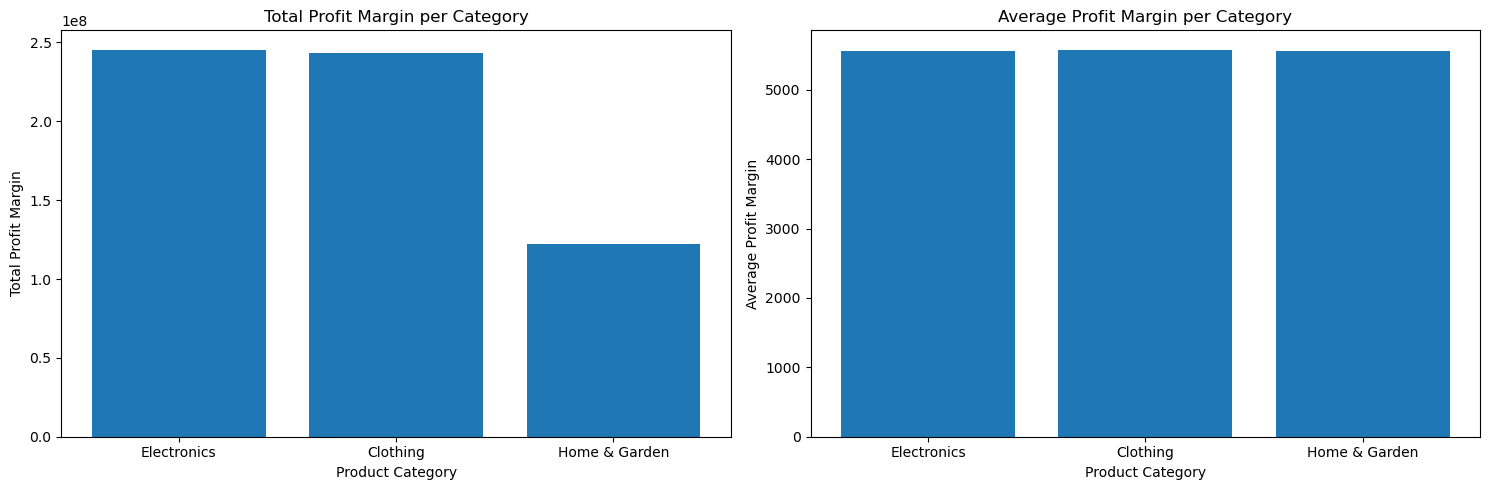

In [13]:
# List out the unique product categories
product_categories = df['Product_Categories'].unique()

# Create a dictionary to store Total Profit Margin and Average Profit Margin 
profit_margin_data = {'Total Profit Margin': [],
                      'Average Profit Margin': []}

# Create a separate datapoint for only the Product_Categories to be able to loop through it
for i, product in enumerate(product_categories):
    category_data = df[df['Product_Categories'] == product]
    
    # To create the profit margin (sellingprice - costprie * Demand(sales))
    profit_margin = (category_data['Selling_Prices'] - category_data['Cost_Prices']) * category_data['Demand']
    
    # Append the profit_margin into the dictionary created above
    profit_margin_data['Average Profit Margin'].append(np.mean(profit_margin))
    profit_margin_data['Total Profit Margin'].append(np.sum(profit_margin))
    
# To plot the the graph
fig, axs = plt.subplots(1,2, figsize=(15,5))

axs[0].bar(x=product_categories, height = profit_margin_data['Total Profit Margin'])
axs[0].set_title('Total Profit Margin per Category')
axs[0].set_ylabel('Total Profit Margin')
axs[0].set_xlabel('Product Category')

axs[1].bar(x=product_categories, height = profit_margin_data['Average Profit Margin'])
axs[1].set_title('Average Profit Margin per Category')
axs[1].set_ylabel('Average Profit Margin')
axs[1].set_xlabel('Product Category')


plt.tight_layout()
plt.show()



### Temporal Analysis

In [14]:
df1 = df.copy()

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109768 entries, 0 to 109767
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  109768 non-null  int64  
 1   Timestamp                   109768 non-null  object 
 2   Demand                      109768 non-null  int64  
 3   Competitor_Prices           109768 non-null  int64  
 4   Inventory_Levels            109768 non-null  int64  
 5   Cost_Prices                 109768 non-null  float64
 6   Selling_Prices              109768 non-null  float64
 7   Product_Categories          109768 non-null  object 
 8   Product_Conditions          109768 non-null  object 
 9   Product_Ratings             109768 non-null  float64
 10  Number_Of_Reviews           109768 non-null  int64  
 11  Days_Since_Product_Listing  109768 non-null  int64  
 12  Customer_Locations          109768 non-null  object 
 13  Customer_Ages 

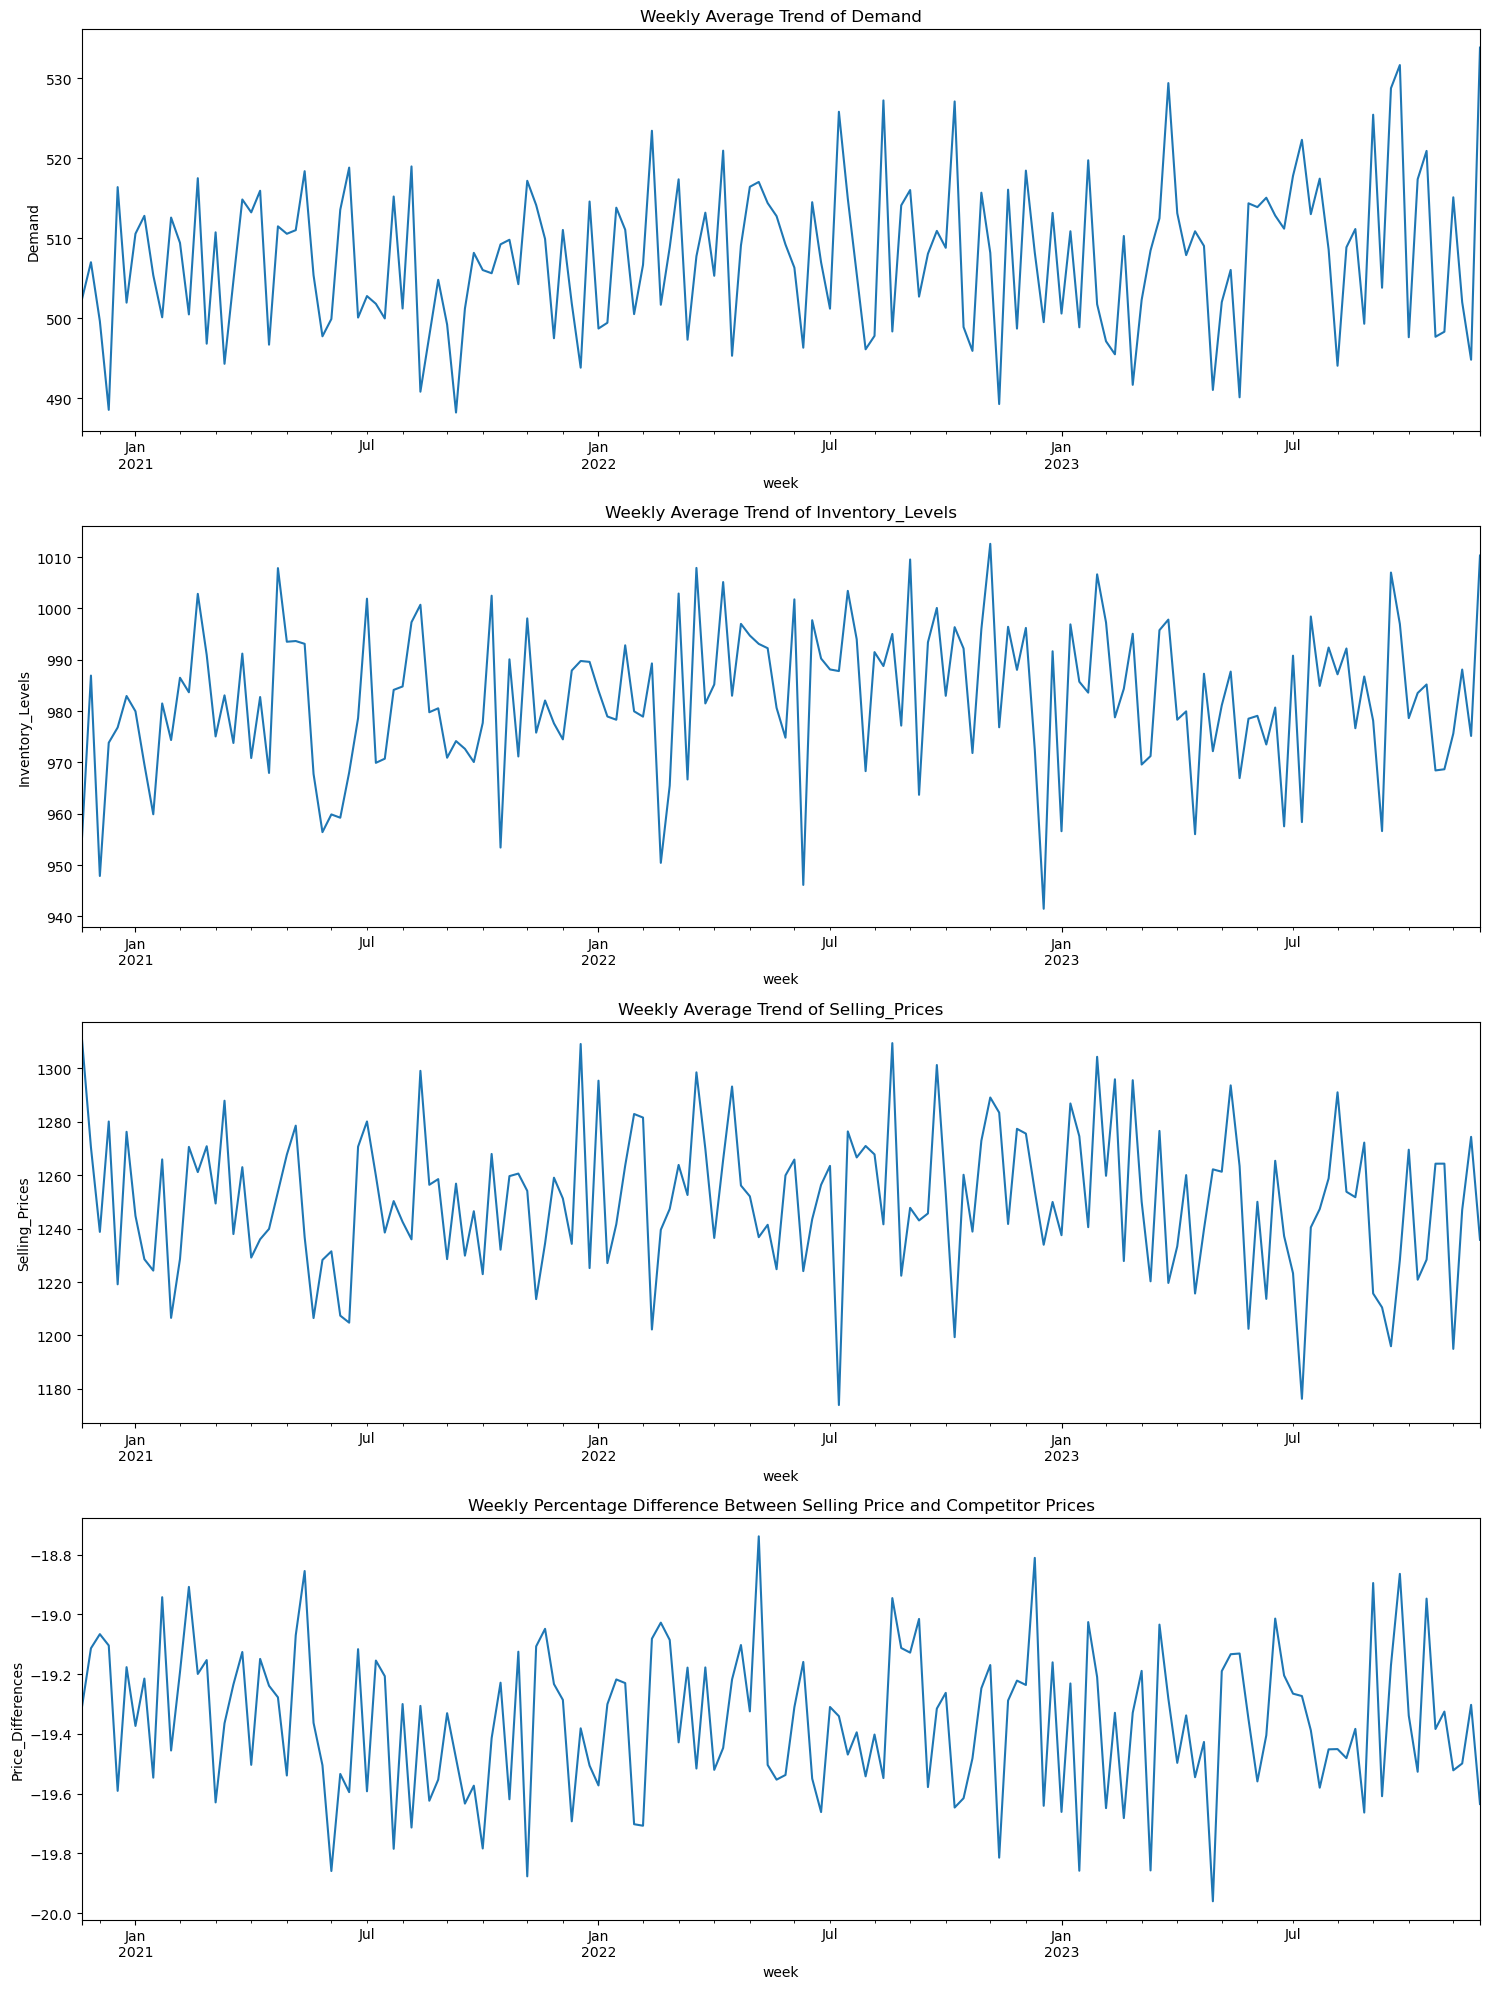

In [16]:
# To convert the date column into pandas datatime object
df1["Timestamp"] = pd.to_datetime(df1["Timestamp"])

# replace the index with the date column
df1.set_index('Timestamp', inplace = True)

# Group the data into weekly data and checkout the average per week for each parameters for only the numerical data
weekly_data = df1.resample('W').mean(numeric_only = True)

# create a function to allow us to plot
def plot_temporal_trends(df1, column, title, ax):
    df1[column].plot(ax=ax)
    ax.set_title(title)
    ax.set_xlabel('week')
    ax.set_ylabel(column)

# Columns you want to see the trend
fig, axs = plt.subplots(4,1, figsize=(15,20))

trend_columns = ['Demand', 'Inventory_Levels', 'Selling_Prices', ]
for i, col in enumerate(trend_columns):
    plot_temporal_trends(weekly_data, col, f'Weekly Average Trend of {col}', axs[i])

# Checking the differences between our price(selling price) and the competitor prices in percentage
weekly_data['Price_Differences'] = (weekly_data['Selling_Prices'] - weekly_data['Competitor_Prices']) * 100  \
                                    / weekly_data['Competitor_Prices']

plot_temporal_trends(weekly_data, 
                     'Price_Differences', 
                     'Weekly Percentage Difference Between Selling Price and Competitor Prices',
                     ax = axs[3])

plt.tight_layout()
plt.show()

**Observations**
- Weekly Average Demand falls within 450 - 550
- Weekly Average Inventory Level falls within 940 - 1010
- Weekly Average Selling price falls within 1150 - 1400
- Our Average Weekly Selling price is always (18 - 20)% lower than our competitors prices

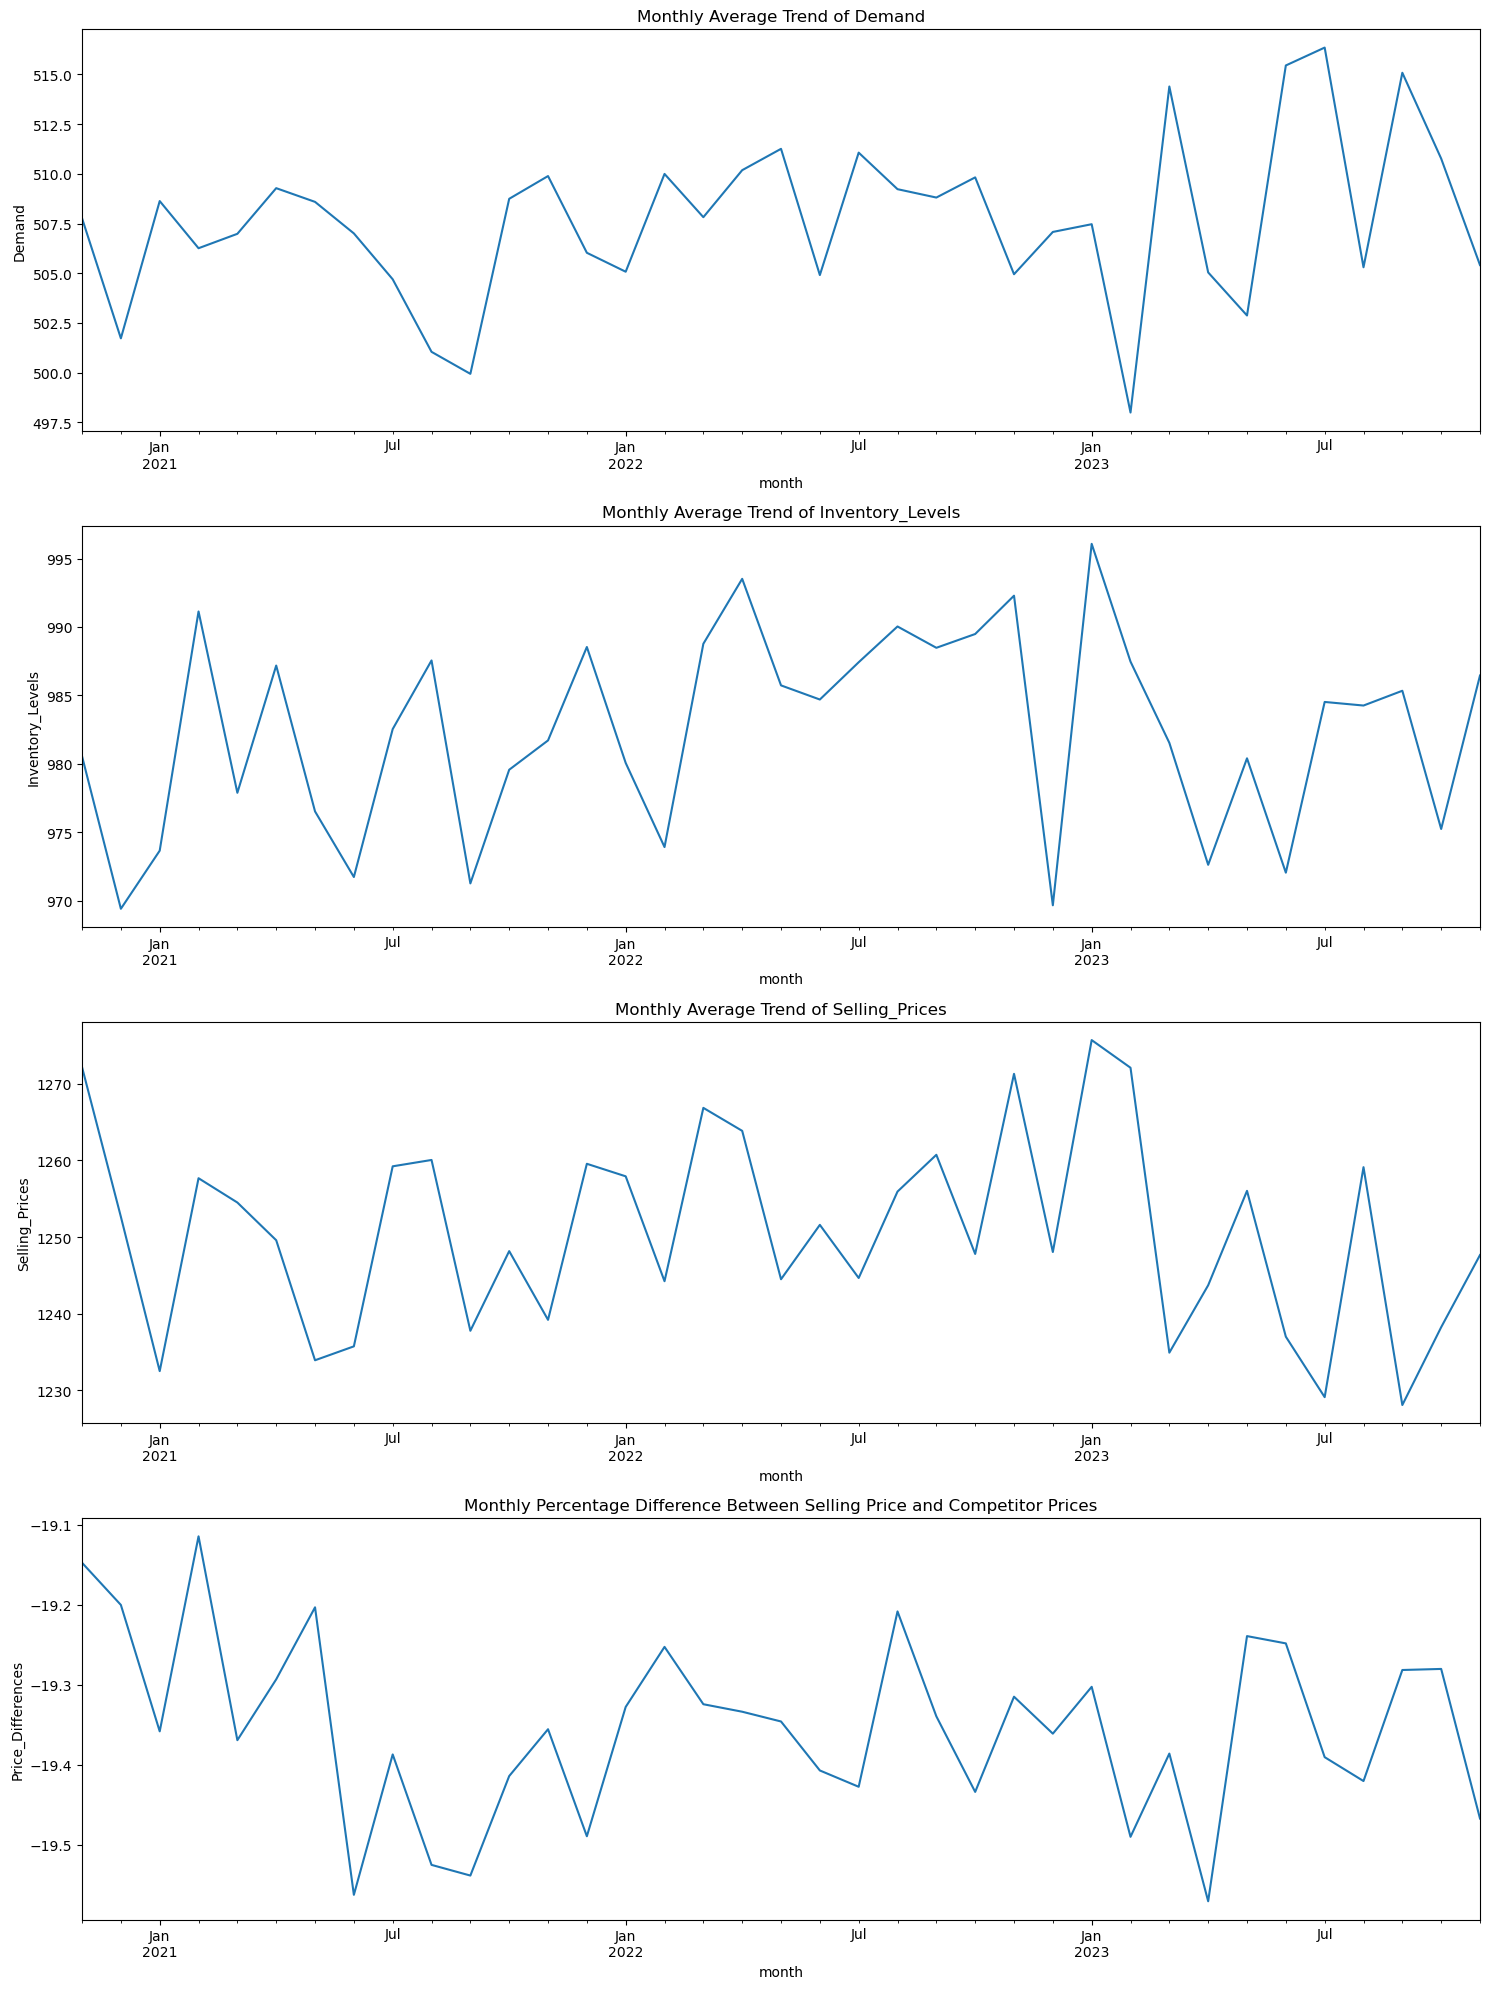

In [17]:
# Group the data into weekly data and checkout the average per week for each parameters for only the numerical data
monthly_data = df1.resample('M').mean(numeric_only = True)

# create a function to allow us to plot
def plot_temporal_trends(df1, column, title, ax):
    df1[column].plot(ax=ax)
    ax.set_title(title)
    ax.set_xlabel('month')
    ax.set_ylabel(column)

# Columns you want to see the trend
fig, axs = plt.subplots(4,1, figsize=(15,20))

trend_columns = ['Demand', 'Inventory_Levels', 'Selling_Prices', ]
for i, col in enumerate(trend_columns):
    plot_temporal_trends(monthly_data, col, f'Monthly Average Trend of {col}', axs[i])

# Checking the differences between our price(selling price) and the competitor prices in percentage
monthly_data['Price_Differences'] = (monthly_data['Selling_Prices'] - monthly_data['Competitor_Prices']) * 100  \
                                    / monthly_data['Competitor_Prices']

plot_temporal_trends(monthly_data, 
                     'Price_Differences', 
                     'Monthly Percentage Difference Between Selling Price and Competitor Prices',
                     ax = axs[3])

plt.tight_layout()
plt.show()

**Observations**
- Monthly Average Demand falls within 497 - 520
- Monthly Average Inventory Level falls within 960 - 1000
- Monthly Average Selling price falls within 1220 - 1280
- Our Average Monthly Selling price is always (19 - 20)% lower than our competitors prices

### Feature Engineering

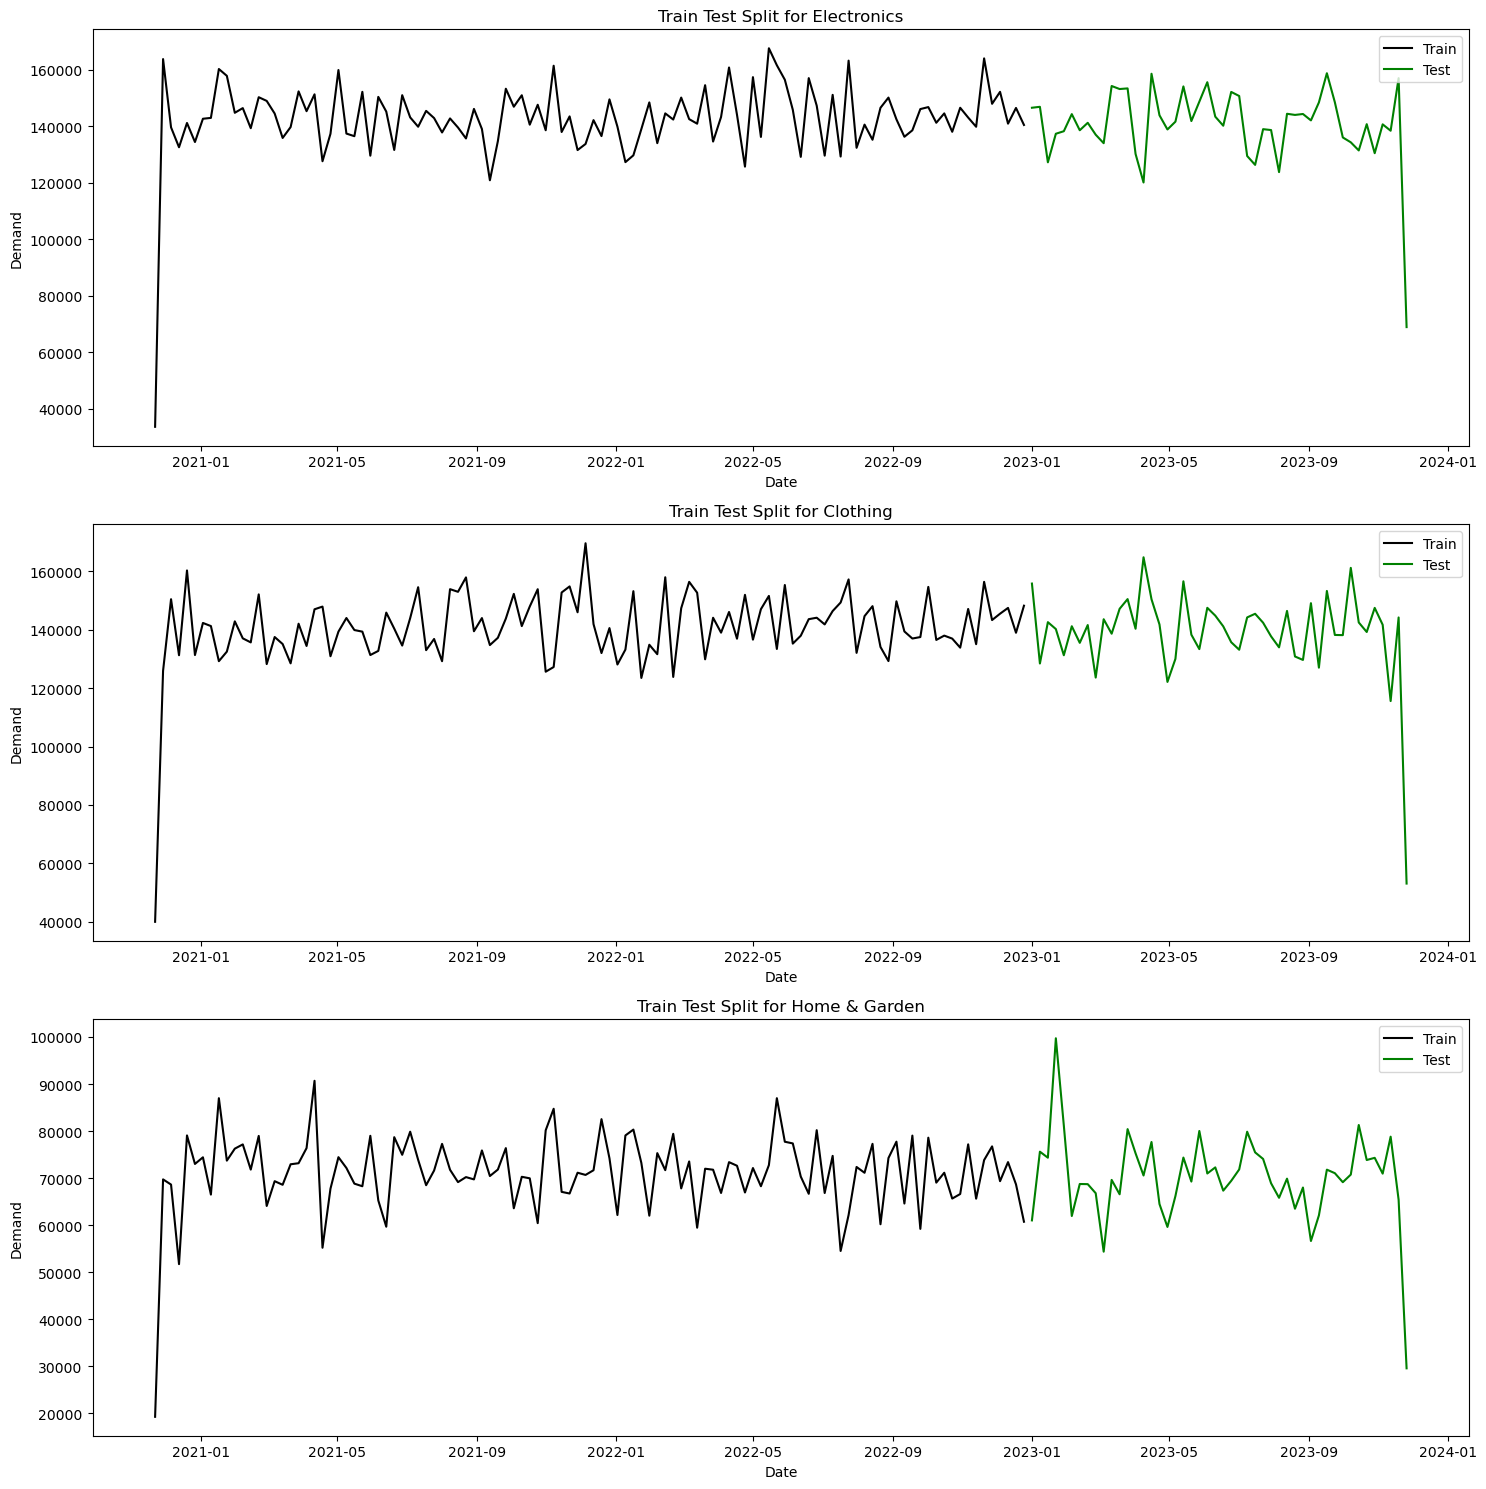

In [18]:
# To convert the date column into pandas datatime object
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# List out the unique product categories
product_categories = df['Product_Categories'].unique()

# Create a dictionary to store the data
train_data = dict()
test_data = dict()

fig, ax = plt.subplots(3,1, figsize=(15,15))

for i, product in enumerate(product_categories):
    category_data = df[df['Product_Categories'] == product]         # filter out product that are in this product category
    category_data.set_index('Timestamp', inplace = True)            # replace the index of the data with timestamp
    category_data = category_data.resample('W').sum(numeric_only = True)         # Sumup demand by weeks
    
    train = category_data.loc[category_data.index.year < 2023]
    train = train['Demand']
    
    test = category_data.loc[category_data.index.year >= 2023]
    test = test['Demand']
    
    train_data [product] = train
    test_data [product] = test
    
    ax[i].plot(train.index, train, color = 'black')
    ax[i].plot(test.index, test, color = 'green')
    ax[i].set_title(f'Train Test Split for {product}')
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Demand')
    ax[i].legend(['Train', 'Test'], loc = 'upper right')
    
plt.tight_layout()
plt.show() 
    


### Demand Forecasting

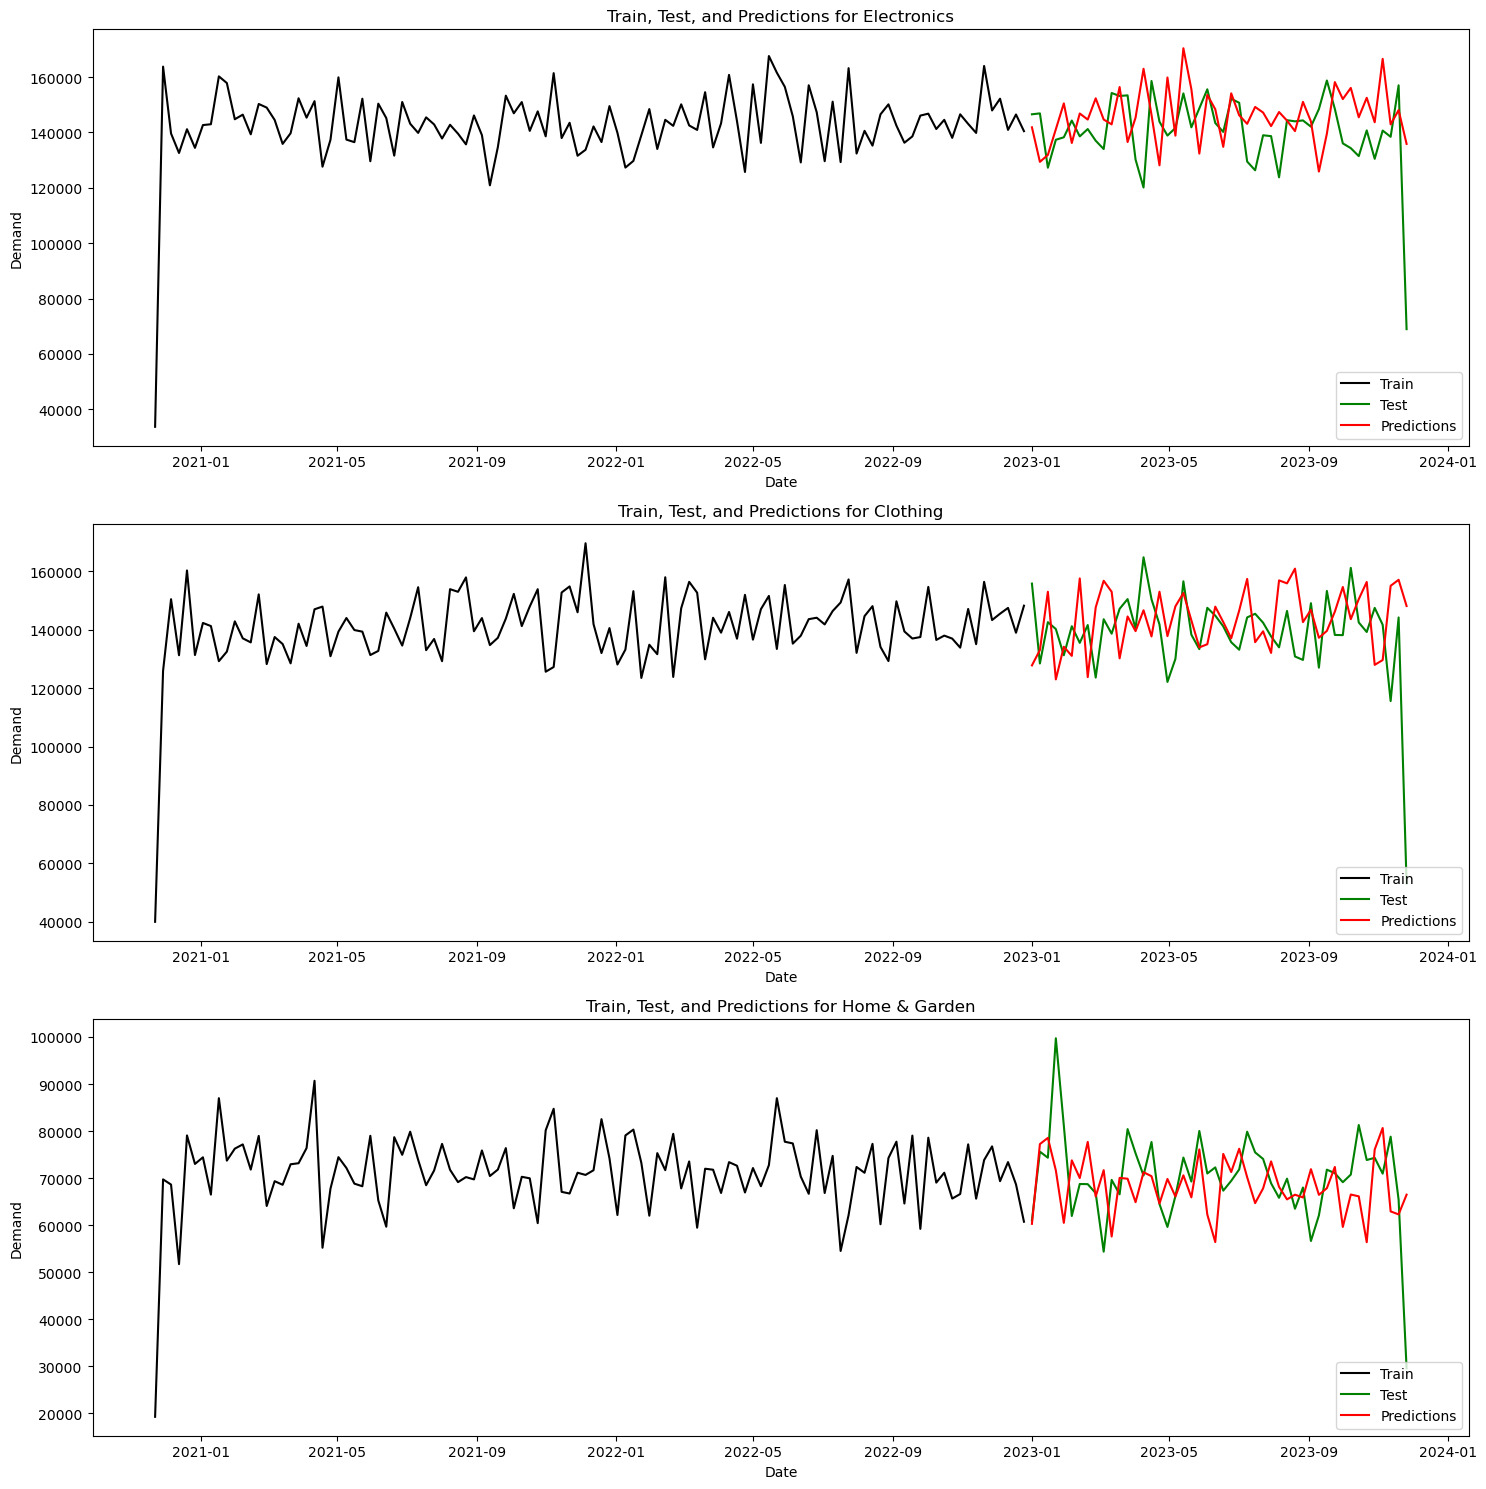

RMSE: 16056.598272141377
MAE: 11670.824744272051
MAPE: 11.813523206933136


In [19]:
es_models = dict()
rmse, mae, mape = 0,0,0
fig, ax = plt.subplots(3,1, figsize=(15,15))

for i, product in enumerate(product_categories):
    train = train_data[product]          # we picked the trend data(train) we saved during feature engineering 
    test = test_data[product]            # we picked the trend data(test) we saved during feature engineering 
    
    # Instantiate the model
    model = ExponentialSmoothing(train, trend = 'add', seasonal = 'add', seasonal_periods = 52)  #buiding a forecast model for 52 weeks
    model_fit = model.fit()

    predictions = model_fit.forecast(steps = len(test))

    es_models[product] = model_fit

    # calculating metrics
    product_rmse = mean_squared_error(test, predictions, squared = False)
    product_mae = mean_absolute_error(test, predictions)
    product_mape = mean_absolute_percentage_error(test, predictions) * 100

    rmse += product_rmse
    mae += product_mae
    mape += product_mape

    ax[i].plot(train.index, train, color = 'black')
    ax[i].plot(test.index, test, color = 'green')
    ax[i].plot(predictions.index, predictions, color = 'red')
    ax[i].set_title(f'Train, Test, and Predictions for {product}')
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Demand')
    ax[i].legend(['Train', 'Test', 'Predictions'], loc = 'lower right')
    
plt.tight_layout()
plt.show()

print('RMSE:', rmse/len(product_categories))     # product_categories or 3 since we have 3 product categories
print('MAE:', mae/len(product_categories))
print('MAPE:', mape/len(product_categories))


**Observations**
- For all the product categories (i.e Electronics, Clothing, Home & Gardens) our predicted model somewhat follows the trend.
- For the metrics our Mape is 11% which means there is an error of approximately **12%**. so this gives an accuracy **88% (100% - 12%)**. 

### Price Optimization

In [20]:
def profit_objective(price, cost_price, predicted_demand):         # thisfunction maximize profit
    revenue = price * predicted_demand
    cost = cost_price * predicted_demand
    profit = revenue - cost
    
    return -profit     # there is a negative sign(-) because this is a minimizing function and the minimization will work better

# define the function that will find the optimal pricing
def find_optimal_price(cost_price, competitor_price, predicted_demand):       
    initial_price = (cost_price + competitor_price) / 2      # initial starting point for price
    bounds = [(cost_price, competitor_price * 0.9)]
    
    optimal_price = minimize(profit_objective, initial_price, args=(cost_price, predicted_demand), bounds = bounds)
    
    return optimal_price.x[0]

In [21]:
               #Split the dataset into previous data and future data
# previous_data: All data known below 2023
# Future data: we assume only product ID and costprice of products areknown from 2023 and above so that we can compare the optimization for the future data with the original dataset 


previous_data = dict()
future_data = dict()

for product in product_categories:
    category_data = df[df['Product_Categories'] == product]
    
    previous_data[product] = category_data.loc[category_data['Timestamp'].dt.year < 2023]
    future_data[product] = category_data.loc[category_data['Timestamp'].dt.year >= 2023]

In [22]:
# Four things to consider inorder to forecast the price of the newly purchased productfor the comming weeks
# 1. Cost of new product for the new week per product ID
# 2. Previous Competitor prices per product ID
# 3. New week demand forecast per product ID
# 4. Product ID

price_optimization_data = dict()

for product in product_categories:
    avg_previous_competitor_price_per_product = previous_data[product].groupby('Product_ID').mean(numeric_only = True)['Competitor_Prices']
    
    total_previous_demand_per_product = previous_data[product].groupby('Product_ID').sum(numeric_only = True)['Demand']
    
    previous_weekly_data = previous_data[product].groupby([previous_data[product]['Timestamp'].dt.to_period('W'), 'Product_ID']).mean(numeric_only = True)
    
    previous_weekly_dates = previous_weekly_data.index.get_level_values(0).unique()
    
    future_weekly_data = future_data[product].groupby([future_data[product]['Timestamp'].dt.to_period('W'), 'Product_ID']).mean(numeric_only = True)
    
    future_weekly_dates = future_weekly_data.index.get_level_values(0).unique()
    
    future_weekly_total_forecast = es_models[product].forecast(steps = len(previous_weekly_dates)).values
    
    for  j, date in enumerate(future_weekly_dates):
        date_str = str(date)
        if date_str not in price_optimization_data:
            price_optimization_data[date_str] = dict()
        
        weekly_cost_price_per_product = future_weekly_data.loc[date]['Cost_Prices']
        
        product_ids = weekly_cost_price_per_product.index
        
        weekly_product_demand_ratio = total_previous_demand_per_product.loc[product_ids] \
                                    / np.sum(total_previous_demand_per_product.loc[product_ids])
        
        weekly_demand_per_product = weekly_product_demand_ratio * future_weekly_total_forecast[j]
        
        weekly_demand_per_product = weekly_demand_per_product.reindex(product_ids, fill_value = 0)
        
        weekly_competitor_price_per_product = avg_previous_competitor_price_per_product.reindex(product_ids, fill_value=0)
        
        price_optimization_data[date_str][product] = {'Weekly_Cost_Price_Per_Product': weekly_cost_price_per_product.values,
                                                      'Avg_Competitor_Price_Per_Product': weekly_competitor_price_per_product.values,
                                                      'Weekly_Demand_Forecast_Per_Product': weekly_demand_per_product.values,
                                                      'Product_IDs': product_ids}
        


In [23]:
# Performing Optimization

for week in price_optimization_data:
    for product in product_categories:
        
        cost_price = price_optimization_data[week][product]['Weekly_Cost_Price_Per_Product']
        competitor_price = price_optimization_data[week][product]['Avg_Competitor_Price_Per_Product']
        predicted_demand = price_optimization_data[week][product]['Weekly_Demand_Forecast_Per_Product']
        
        optimal_price = []
        
        for csp, cpp, prd in zip(cost_price, competitor_price, predicted_demand):
            try:
                opt_price = find_optimal_price(csp, cpp, prd)
                optimal_price.append(opt_price)
            except Exception:
                optimal_price.append(csp * 1.1)
            else:
                continue
        
        #Save the Optimal price
        price_optimization_data[week][product]['Optimal_Price'] = optimal_price
          

In [24]:
# Join the actual future data to our forecast future data then compare

product_weekly_data = dict()

for week in price_optimization_data:
    product_weekly_data[week] = dict()
    
    start_date, end_date = week.split('/')
    
    for product in product_categories:
        category_data = df[df['Product_Categories'] == product]
        
        week_data = category_data[category_data['Timestamp'].between(start_date, end_date)]
        
        optimal_price_map = dict(
                                 zip(price_optimization_data[week][product]['Product_IDs'],
                                     price_optimization_data[week][product]['Optimal_Price'])
                                )
        
        optimal_demand_map = dict(
                                 zip(price_optimization_data[week][product]['Product_IDs'],
                                     price_optimization_data[week][product]['Weekly_Demand_Forecast_Per_Product'])
                                )
        
        week_data['Optimal_Price'] = week_data['Product_ID'].map(optimal_price_map)
        week_data['Predicted_Demand'] = week_data['Product_ID'].map(optimal_demand_map)
        product_weekly_data[week][product] = week_data
        

In [25]:
weekly_optimization_result = {}

for product in product_categories:
    weekly_optimization_result[f'Profit_Margin_Usual_{product}'] = np.zeros(len(product_weekly_data))
    weekly_optimization_result[f'Profit_Margin_Optimal_{product}'] = np.zeros(len(product_weekly_data))
    weekly_optimization_result[f'Price_Difference_Usual_{product}'] = np.zeros(len(product_weekly_data))
    weekly_optimization_result[f'Price_Difference_Optimal_{product}'] = np.zeros(len(product_weekly_data))
    
    for i, week in enumerate(product_weekly_data):
        old_profit_margin = np.sum((product_weekly_data[week][product]['Selling_Prices'] \
                                   - product_weekly_data[week][product]['Cost_Prices']) \
                                    * product_weekly_data[week][product]['Demand'])
        
        new_profit_margin = np.sum((product_weekly_data[week][product]['Optimal_Price'] \
                                   - product_weekly_data[week][product]['Cost_Prices']) \
                                    * product_weekly_data[week][product]['Predicted_Demand'])
        
        old_price_difference = np.mean(product_weekly_data[week][product]['Competitor_Prices'] \
                                   - product_weekly_data[week][product]['Selling_Prices'])
        
        new_price_difference = np.mean(product_weekly_data[week][product]['Competitor_Prices'] \
                                   - product_weekly_data[week][product]['Optimal_Price'])
        
        weekly_optimization_result[f'Profit_Margin_Usual_{product}'][i] = old_profit_margin
        weekly_optimization_result[f'Profit_Margin_Optimal_{product}'][i] = new_profit_margin
        weekly_optimization_result[f'Price_Difference_Usual_{product}'][i] = old_price_difference
        weekly_optimization_result[f'Price_Difference_Optimal_{product}'][i] = new_price_difference
        
for p in ['Profit_Margin', 'Price_Difference']:
    for t in ['Usual', 'Optimal']:
        weekly_optimization_result[f'{p}_{t}_Average'] = np.array([weekly_optimization_result[f'{p}_{t}_{product}'] \
                                                                      for product in product_categories]).sum(axis=0)

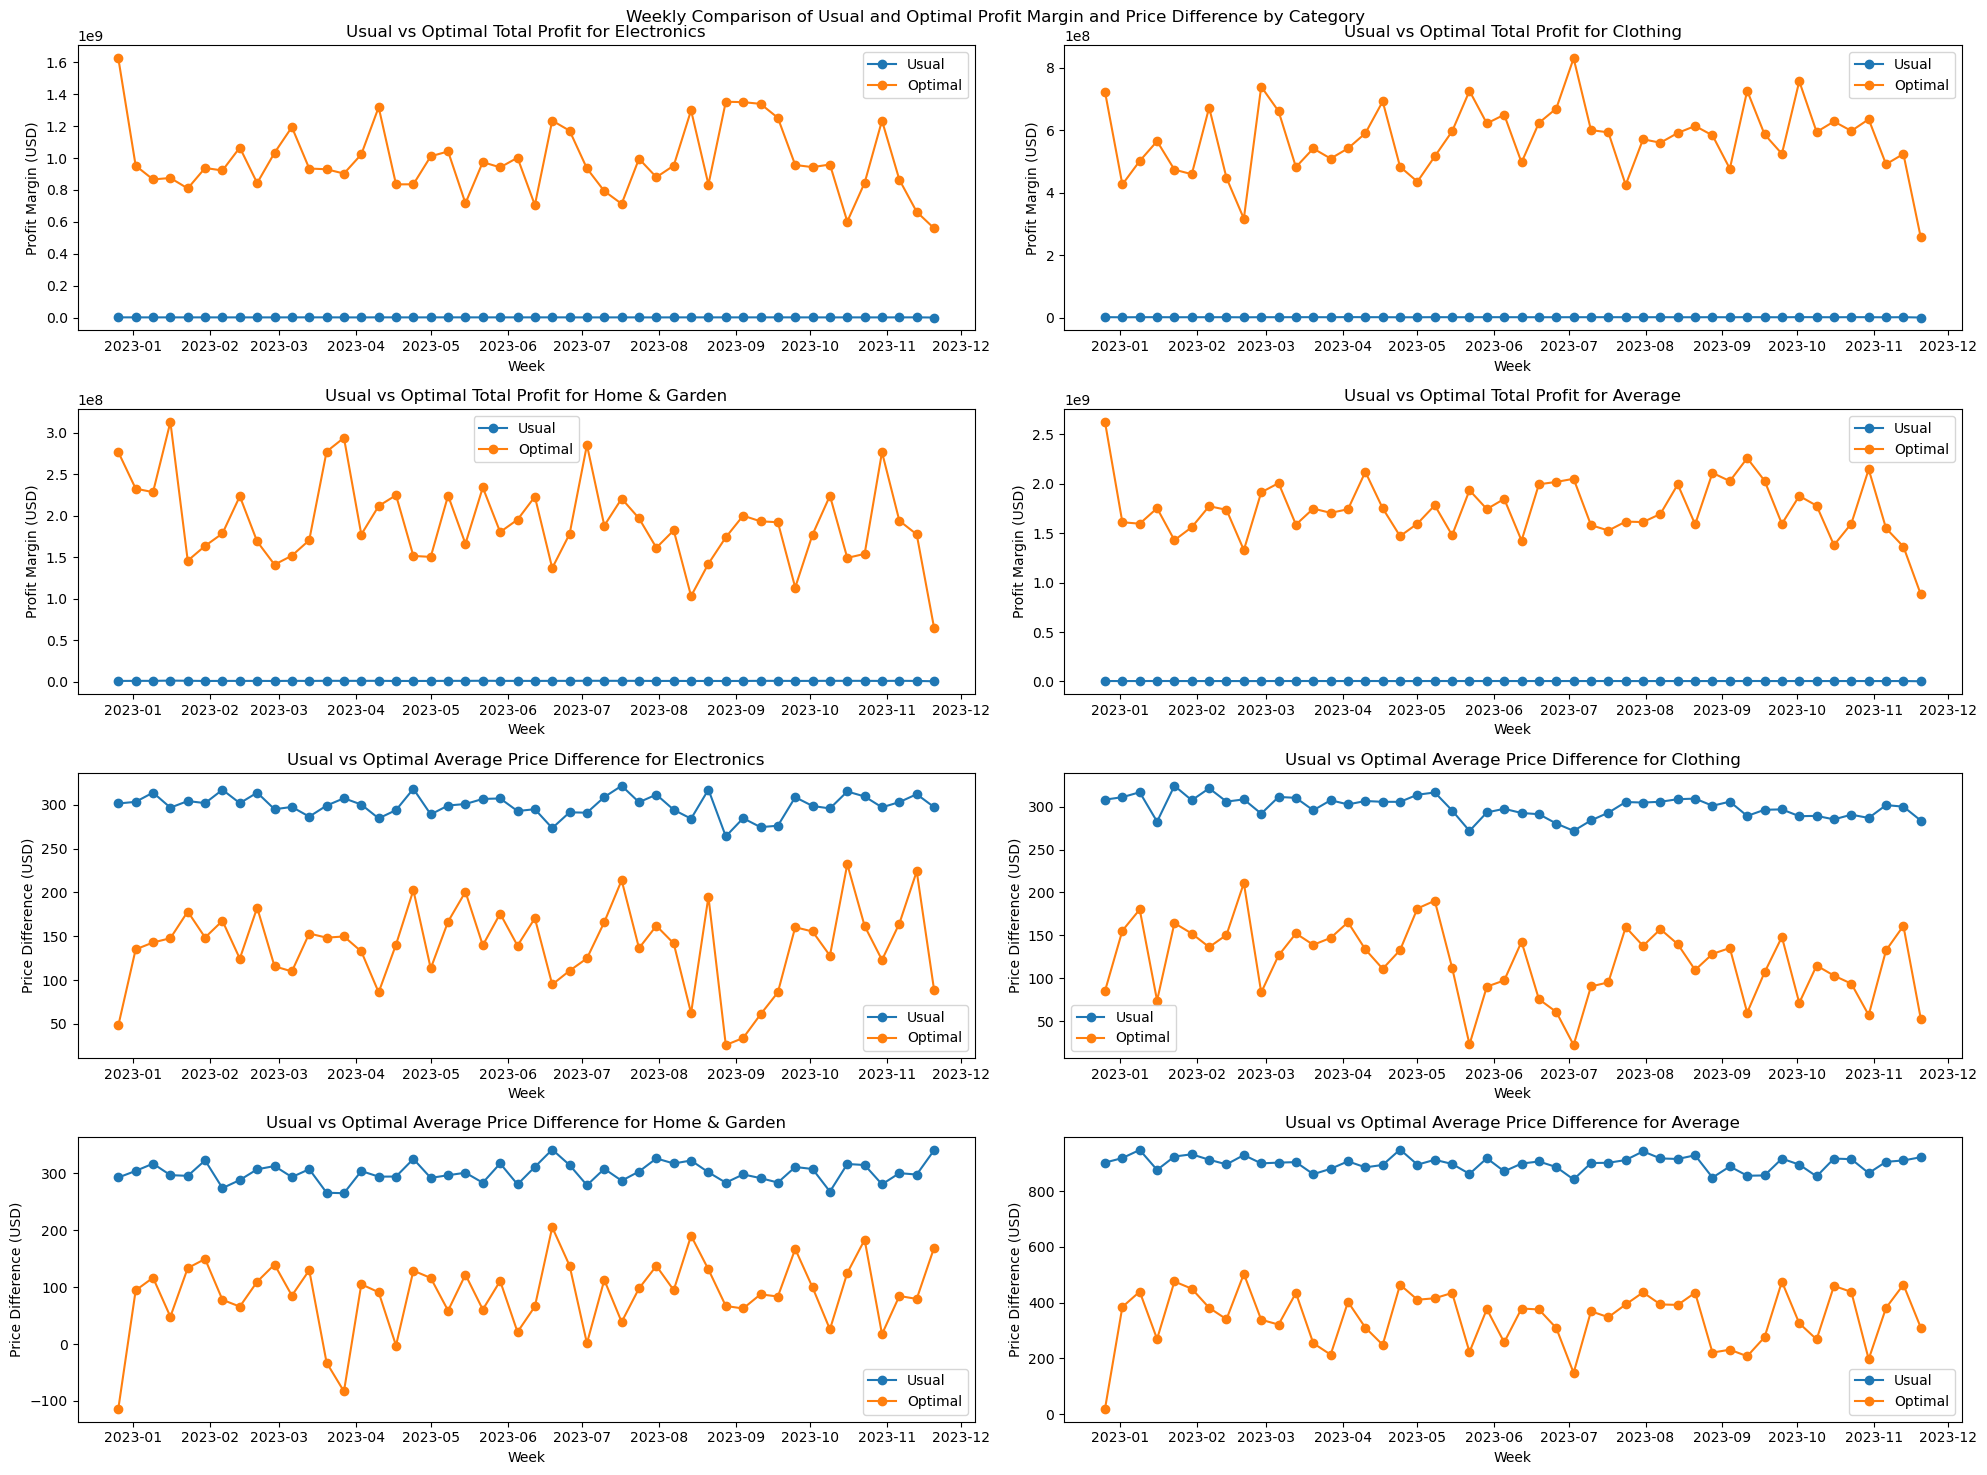

In [26]:
result_dates = [pd.to_datetime(week.split('/')[0]).date() for week in price_optimization_data]

fig, axs = plt.subplots(4,2, figsize = (20,15))
axes_flat = iter(axs.flat)

fig.suptitle('Weekly Comparison of Usual and Optimal Profit Margin and Price Difference by Category')

plot_types = ['Profit_Margin', 'Price_Difference']
plot_categories = ['Electronics', 'Clothing', 'Home & Garden', 'Average']

for pt in plot_types:
    for pc in plot_categories:
        ax = next(axes_flat)
        ax.plot(result_dates, weekly_optimization_result[f'{pt}_Usual_{pc}'], label = 'Usual', marker = 'o')
        ax.plot(result_dates, weekly_optimization_result[f'{pt}_Optimal_{pc}'], label = 'Optimal', marker = 'o')
        if pt == 'Profit_Margin':
            ax.set_ylabel('Profit Margin (USD)')
            ax.set_title(f'Usual vs Optimal Total Profit for {pc}')
        else:
            ax.set_ylabel('Price Difference (USD)')
            ax.set_title(f'Usual vs Optimal Average Price Difference for {pc}')
        ax.set_xlabel('Week')
        ax.legend(['Usual', 'Optimal'])
        
plt.tight_layout()
plt.show()






**Observations**
- Optimal Total profit has drastically improved for all the product categories (i.e Electronics, Clothing, Home & Gardens) and same for Optimal Average profit for all the categories.
- Optimal Average price diffreonce between our selling price and the competitor price has reduced for all the product categories (i.e Electronics, Clothing, Home & Gardens) inorder not to lose too much money.
- Our prices never goes above the competitor pricces except few instances in Average Price Difference for Home & Garden showing prices in the negative axis which indicate our prices are above that of our competitors'.